<a href="https://colab.research.google.com/github/Anna172/ML/blob/master/%D0%B4%D0%B71_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
data = pd.read_csv("HW1_var_11.csv", delimiter=';')
data.head()

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,11,1000011,Поступление зарплаты на счет,Другое,0,0.33,женский,0,0,высшее,вспомогательный персонал,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,1000031,Форма банка (без печати работодателя),Лечение,1,0.49,женский,0,0,среднее-специальное,вспомогательный персонал,>250,0.0,109.0,46.0,Торговля,ЗАО,холост / не замужем,3.0,2.0,2.0,1.0,0.0,0.089109,0.0,0.0,0.0,0.0,0.600000,3.0,2.0,92.0,5.0,2.0,1.0,17.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,1000051,2НДФЛ,Другое,1,0.59,женский,0,0,среднее-специальное,вспомогательный персонал,>250,0.0,47.0,47.0,Торговля,ООО,холост / не замужем,1.0,0.0,0.0,0.0,0.0,0.006369,1.0,0.0,0.0,0.0,0.555556,5.0,4.0,156.0,9.0,3.0,1.0,18.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,1000071,Поступление зарплаты на счет,Покупка автомобиля,1,0.36,мужской,0,0,высшее,специалист,>250,0.0,32.0,27.0,Информационные технологии,ООО,холост / не замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,7.0,1.0,0.0,1.0,32.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,1000091,Свободная форма с печатью работодателя,Ремонт,1,0.53,женский,0,0,высшее,специалист,< 50,0.0,27.0,50.0,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сразу удалим из датасета переменные без описания и технического характера

In [6]:
data = data.drop("Номер варианта", axis = 1)
data = data.drop("ID", axis = 1)
data = data.drop("thirty_in_a_year", axis = 1)
data = data.drop("sixty_in_a_year", axis = 1)
data = data.drop("ninety_in_a_year", axis = 1)
data = data.drop("thirty_vintage", axis = 1)
data = data.drop("sixty_vintage", axis = 1)
data = data.drop("ninety_vintage", axis = 1)

data.shape

(10242, 36)

По каждой переменной набора данных рассчитаем: число уникальных значений (UNIQUE и PERCENT_UNIQUE), число нудевых значений (ZEROS и PERCENT_ZEROS), число пропущенных значений (NANS и PERCENT_NANS) и тип данных (DATA_TYPE). Результаты приведены в таблице ниже:

In [7]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt


,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,5,0.0488186,0,0,61,0.595587,object
CREDIT_PURPOSE,10,0.0976372,0,0,0,0,object
INSURANCE_FLAG,2,0.0195274,3975,38.8108,0,0,int64
DTI,61,0.595587,2,0.0195274,122,1.19117,float64
SEX,2,0.0195274,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,6,0.0585823,6073,59.2951,0,0,int64
DEPENDANT_NUMBER,4,0.0390549,10214,99.7266,0,0,int64
EDUCATION,9,0.0878735,0,0,0,0,object
EMPL_TYPE,10,0.0976372,0,0,2,0.0195274,object
EMPL_SIZE,9,0.0878735,0,0,118,1.15212,object


Показатель количество кредитов (all_credits) не имеет нулевых значений, однако 63% наблюдений имеют пропущеные значеня по этому признаку. Также 63% наблюдений имеют пропущенные значения по таким признакам как num_AccountActive180, if_zaog и другим признакам, которые могут быть только у клиентов, имевших хоть 1 кредит. Соответственно, можно сделать вывод, что эти наблюдения не имеют кредитной истории, а потому не помогут быть использованы для сегментации клиентов банка, которые имеют кредит. На 3% меньше пропусков в наблюдениях по таким признакам как кол-во запросов в бюро кредитных историй за последние N дней (maxNdays), логично предположить, что эти три процента только пытаются получить свой первый кредит, и поним также нет кредитной истории. Таким образом, наблюдения, неимеющие кредитной истории мы можем исключить из нашей выборки.

In [9]:
data = data[data['all_credits'] > 0]
data.shape

(3763, 36)

данные в выборке значительно сократились, однако только они имеют необходимый объем информации для сегментации. А объем выборки тем не менее удовлетворителен.

Еще раз посмотрим на данные после удаления записей без кредитной истории:

In [10]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,4,0.106298,0,0,0,0,object
CREDIT_PURPOSE,10,0.265745,0,0,0,0,object
INSURANCE_FLAG,2,0.0531491,1443,38.3471,0,0,int64
DTI,58,1.54132,1,0.0265745,1,0.0265745,float64
SEX,2,0.0531491,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,5,0.132873,2254,59.899,0,0,int64
DEPENDANT_NUMBER,3,0.0797236,3755,99.7874,0,0,int64
EDUCATION,9,0.239171,0,0,0,0,object
EMPL_TYPE,9,0.239171,0,0,0,0,object
EMPL_SIZE,3,0.0797236,0,0,0,0,object


Остался один клиент по которому у нас много пропущенной информации, можно удалить его из выборки без особых потерь. Также есть еще 15 записей с пропущенными значениями по показателю среднего кол-ва задержки (avg_num_delay), заменим эти пропуски средним значением по набору данных.

In [ ]:
data = data[data['all_credits'] > 0]
data.shape

In [40]:
good_features = dt[dt['PERCENT_NANS'] < 15].index.tolist()
norm_features = dt[ (dt['PERCENT_NANS'] > 15) & (dt['PERCENT_NANS'] < 30) ].index.tolist()
bad_features = dt[dt['PERCENT_NANS'] > 50].index.tolist()

print(good_features, norm_features, bad_features)
print(len(good_features), len(norm_features), len(bad_features))
#norm_features

['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE'] ['BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'EMPL_PROPERTY'] ['EMPL_FORM', 'FAMILY_STATUS', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist']
10 4 22


В данном наборе данных есть 10 хороших, с точки зрания отсутствия пропусков, переменных: 'INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE'. 4 переменных с 20% пропущенных значений: 'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'EMPL_PROPERTY'. И 22 переменные с 60% пропущенных значений: 'EMPL_FORM', 'FAMILY_STATUS', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist'. Это следует учитывать в будущем для построения моделей.

In [42]:
smal_nan_coumns = dt[(dt['PERCENT_NANS'] < 2) & (dt['PERCENT_NANS'] > 0)] .index

md = pd.DataFrame(index=data.index)
for col in smal_nan_coumns.tolist():
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        md['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in md.columns if 'ismissing' in col]
md['num_missing'] = md[ismissing_cols].sum(axis=1)

ind_missing = md[md['num_missing'] > 0].index

len(ind_missing.tolist()) / data.shape[0] * 100

created missing indicator for: INCOME_BASE_TYPE
created missing indicator for: DTI
created missing indicator for: EMPL_TYPE
created missing indicator for: EMPL_SIZE


1.1911735989064636

Согласно приведенной выше таблице, 4 поля имеют незначительное количество пропущенных значений (около одного процента). А количество наблюдений, имеющих пропуски в этих полях, также равняется 1% от всего набора данных, поэтому мы можем отбросить эти наблюдения.

In [43]:
data = data.drop(ind_missing, axis=0)
data.shape

(10120, 36)

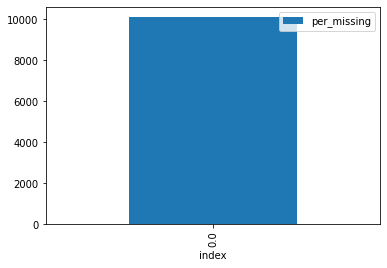

In [48]:
# Теперь посмотрим число пропусков у клиентов 
#сначала создаем индикатор для признаков с пропущенными данными

md = pd.DataFrame(index=data.index)
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        md['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in md.columns if 'ismissing' in col]
md['per_missing'] = md[ismissing_cols].sum(axis=1) / data.shape[1] * 100

md['per_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='per_missing')


In [45]:
a = md[ (md['per_missing'] < 63) & (md['per_missing'] > 50) ].shape[0]/md.shape[0]*100 
b = md[ (md['per_missing'] < 75) & (md['per_missing'] > 65) ].shape[0] /md.shape[0]*100 
c = md[(md['per_missing'] < 56) & (md['per_missing'] > 1)].shape[0] /md.shape[0]*100
d = md[md['per_missing'] == 0].shape[0] /md.shape[0]*100
print(a,b,c,d)

37.54940711462451 22.766798418972332 3.122529644268775 37.00592885375494


In [46]:
dt[dt['PERCENT_NANS'] > 60].shape[0] / dt.shape[0] * 100

61.111111111111114

Согласно представленной выше диаграмме, клиенты разбились на три большие группы по числу пропущенных значений. Совсем не имеют пропусков в данных лишь 37% наблюдений. 60 и 70 процентов пропущенных значений имеют 37.5 и 22.8 процентов выборки. Также на три группы по пропускам разбились и наблюдения (0, 20 и 60 проценотв пропуска). Возможно, это как-то связано. Так как больше половинны переменных в наборе данных больше чем на половину состоят из пропущенных значений, общее число пропусков достаточно велико, поэтому нецелесообразно выбросить из набора данных наблюдения, имеющие пропуски, так как это привеет к значительному сокращению выборки. Поэтому было решено сохранить информацию о таком разделении наблюдений на 3 группы и заменить пропуски на глобальную константу: -60, если по данному признаку около 60% пропуском и на -20, если около 20. Такая замена выгодна с точки зрения последующего анализа по двум причинам: во-первых, потому что отрицательная константа не будет смешиваться с прочими - положительными - числами при анализе и построении моделей; во-вторых, большая по модулю константа будет легко отличима на гистограммах, что упрощает визуальный анализ.

In [47]:
nan_cols60 = dt[dt['PERCENT_NANS'] > 55].index
nan_cols20 = dt[ (dt['PERCENT_NANS'] > 20) & (dt['PERCENT_NANS'] < 30) ].index
data[nan_cols60] = data[nan_cols60].fillna(-60)
data[nan_cols20] = data[nan_cols20].fillna(-20)

data.shape

(10120, 36)



Общий анализ уникальных и нулевых значений показал, что переменная Dependent_number практически на 100% состоит из 0, а значит не несет дополнительной информации и ее можно удалить. 

В наборе данных есть категориаьные переменные, в основном представленные в виде объекта типа object. В дальнейшем для проведения сегментации их необходимо будет преобразовать при помощи OneHotEncoder.



In [49]:
data = data.drop("DEPENDANT_NUMBER", axis = 1)
dt = dt.drop("DEPENDANT_NUMBER", axis = 0)
data.shape

(10120, 35)

In [50]:
# Итого после преобразований получим
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,4,0.0395257,0,0,0,0,object
CREDIT_PURPOSE,10,0.0988142,0,0,0,0,object
INSURANCE_FLAG,2,0.0197628,3863,38.1719,0,0,int64
DTI,60,0.592885,2,0.0197628,0,0,float64
SEX,2,0.0197628,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,6,0.0592885,6004,59.3281,0,0,int64
EDUCATION,9,0.0889328,0,0,0,0,object
EMPL_TYPE,9,0.0889328,0,0,0,0,object
EMPL_SIZE,8,0.0790514,0,0,0,0,object
BANKACCOUNT_FLAG,5,0.0494071,6241,61.67,0,0,float64


In [51]:
# создадим списки категориальных переменных, чтобы потом исследовать распределение набора данных по ним
# создадим список переменых типа object, чтоы потом кодировать из в числовые переменные, это нужно для построения моели на этих данных
categorical_columns = dt[dt['UNIQUE'] < 14].index
notcategorical_columns = dt[dt['UNIQUE'] > 13].index
categorical_columns = categorical_columns.tolist()
notcategorical_columns = notcategorical_columns.tolist()
object_type_columns = dt[dt['DATA_TYPE'] == 'object'].index
object_type_columns = object_type_columns.tolist()

print(len(object_type_columns), len(categorical_columns), len(notcategorical_columns))


9 19 16


Проведем анализ описательных статистик по численным переменным набора данных:

In [52]:
columns = ["COUNT", 'MEAN', 'STD', 'MIN', '25%', '50%', '75%', 'MAX']
numeric_data = data.select_dtypes(include=np.number)
dt = pd.DataFrame(index=numeric_data.columns, columns=columns)

for col in numeric_data.columns:
  dt.loc[col,"COUNT"] = numeric_data[numeric_data[col] >= 0][col].count()
  dt.loc[col,"MEAN"] = numeric_data[numeric_data[col] >= 0][col].mean()
  dt.loc[col,"STD"] = numeric_data[numeric_data[col] >= 0][col].std()
  dt.loc[col,"MIN"] = numeric_data[numeric_data[col] >= 0][col].min()
  dt.loc[col,"25%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.25)
  dt.loc[col,"50%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.50)
  dt.loc[col,"75%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.75)
  dt.loc[col,"MAX"] = numeric_data[numeric_data[col] >= 0][col].max()

dt

,COUNT,MEAN,STD,MIN,25%,50%,75%,MAX
INSURANCE_FLAG,10120,0.618281,0.485832,0,0,1,1,1
DTI,10120,0.387964,0.136878,0,0.28,0.4,0.49,0.59
FULL_AGE_CHILD_NUMBER,10120,0.559684,0.775269,0,0,0,1,5
BANKACCOUNT_FLAG,7816,0.367579,0.855298,0,0,0,0,4
Period_at_work,7816,65.9913,67.4133,4,20,44,87,502
age,7816,36.3532,8.73083,23,29,35,43,63
max90days,4015,1.67073,1.89778,0,1,1,2,31
max60days,4015,1.20249,1.54475,0,0,1,2,14
max30days,4015,0.894147,1.30023,0,0,1,1,12
max21days,4015,0.678954,1.13744,0,0,0,1,12


При анализе описательных статистик было выявлено, что некоторые пременные, например, Period_at_work, sum_of_paym_months и тд имеют выбросы. Так как максимальное значение в несколько раз отличается от 75% квантиле. Далее будет проведен более подробный анализ выбрасов.

По численным переменным была построена корреляционная карта:

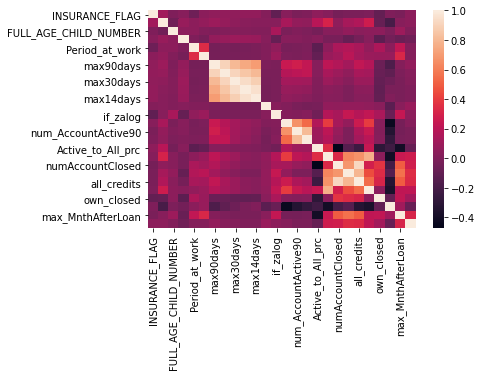

In [53]:
sns.heatmap(numeric_data[numeric_data[col] >= 0].corr())

Карта показывает, что в основном, между переменными наблюдается низкая корреляция, а потому лиейно-регрессионный анализ в данном случае может быть неуместен.

На рисунке ниже приведены гистограммы по численным переменным (с опущенными пропусками) набора данных:

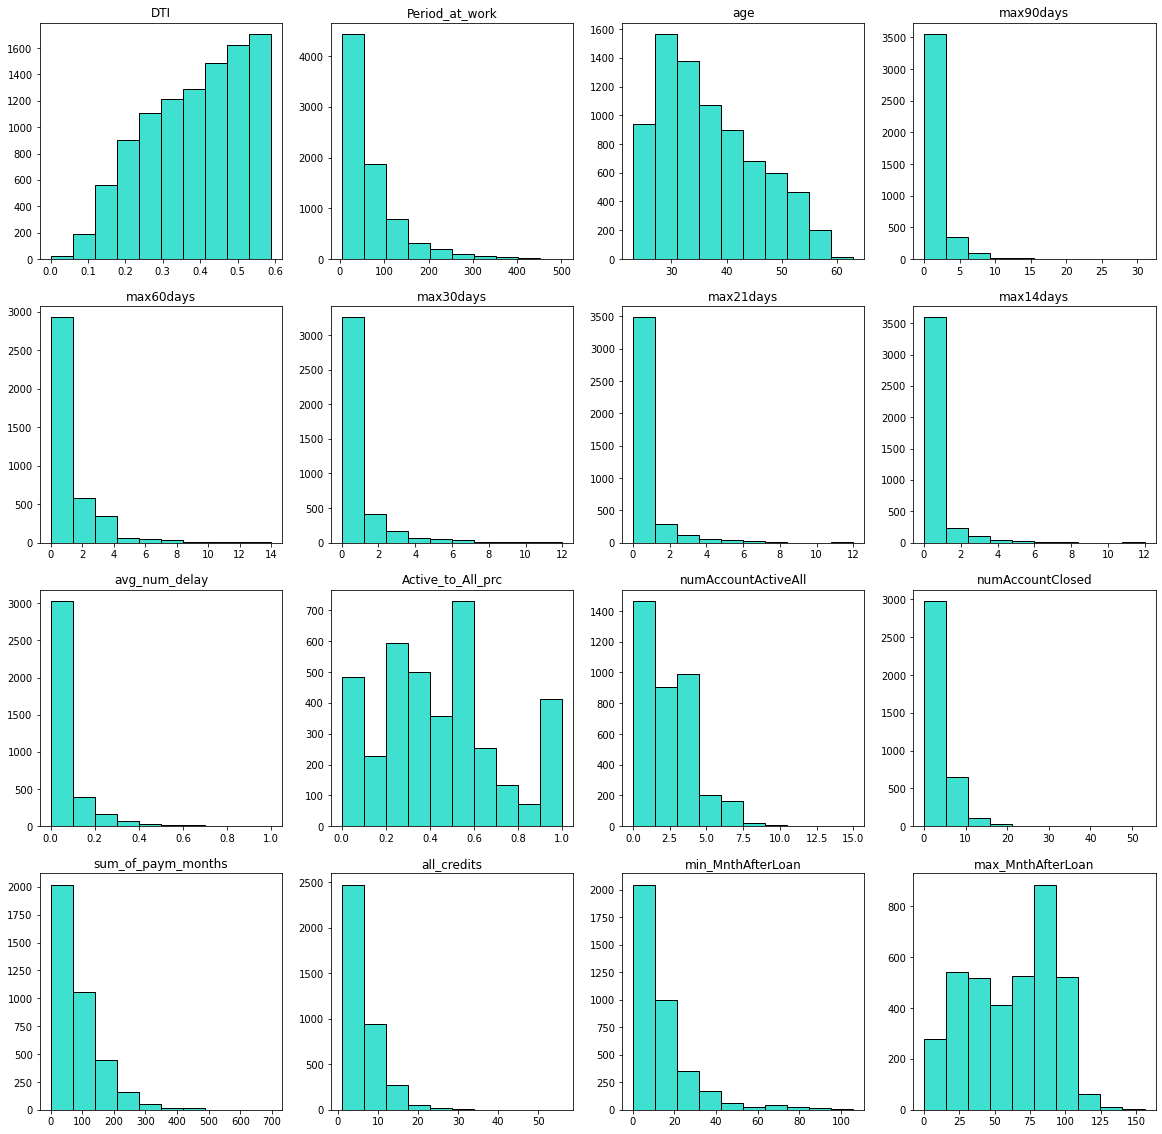

In [54]:
r = 4
c = 4
numeric_data = data[notcategorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (r*5, c*5))

i = 0
j = 0

for col in numeric_data.columns:
    if (i < r) & (j < c): 
      ax[i, j].hist(numeric_data[numeric_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      ax[i, j].hist(numeric_data[numeric_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Из визуального анализа гистограмм можно заметить, что в выборке присутствуют, в основном, молодое поколение (до 40 лет) с небольшим количеством дней работы(до 100 дней), и отсутствуют пожилые люди (после 60 лет), а также люди, работающие более года (AGE и Period_at_work). Также в выборке достаточно много индивидов с высоким отношением долга к доходам (DTI). Велико число человек с низким числом активных кредитов и банковских счетов (all_credits и numAccountActiveAll), а также недавно взявших свой первый кредит (max_MnthAfterLoan), совершивших небольшое число платежей за послений месяц (sum_of_paym_months). Это наводит на мысль, что в данных должны проявиться как минимум следующие кластеры: молодые люди, еще не бравшие кредитов; молодые люди, взявшие один кредит и имеющие низкие доход, так, что соотношение долга к доходам значительно; люди среднего возраста, имеющие активную кредитную историю.

Теперь рассмотрим распределение данных по категориальным переменным


In [55]:
# создадим набор категориальных данных, где закодируем все переменный типа обект в числовые переменные

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cd = pd.DataFrame( data[ (data[categorical_columns] != -20) & (data[categorical_columns] != -60) ][categorical_columns])

for col in object_type_columns:
  cd[col] = labelencoder.fit_transform(cd[col].astype(str))

cd.tail()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,SEX,FULL_AGE_CHILD_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_not_cc,own_closed,dlq_exist
10237,2,8,0,0,1,4,4,2,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10238,0,8,1,0,1,7,0,3,3.0,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10239,3,9,1,1,0,4,4,3,0.0,9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10240,3,9,1,1,1,6,0,4,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10241,0,9,1,1,0,4,4,3,0.0,8,6,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0


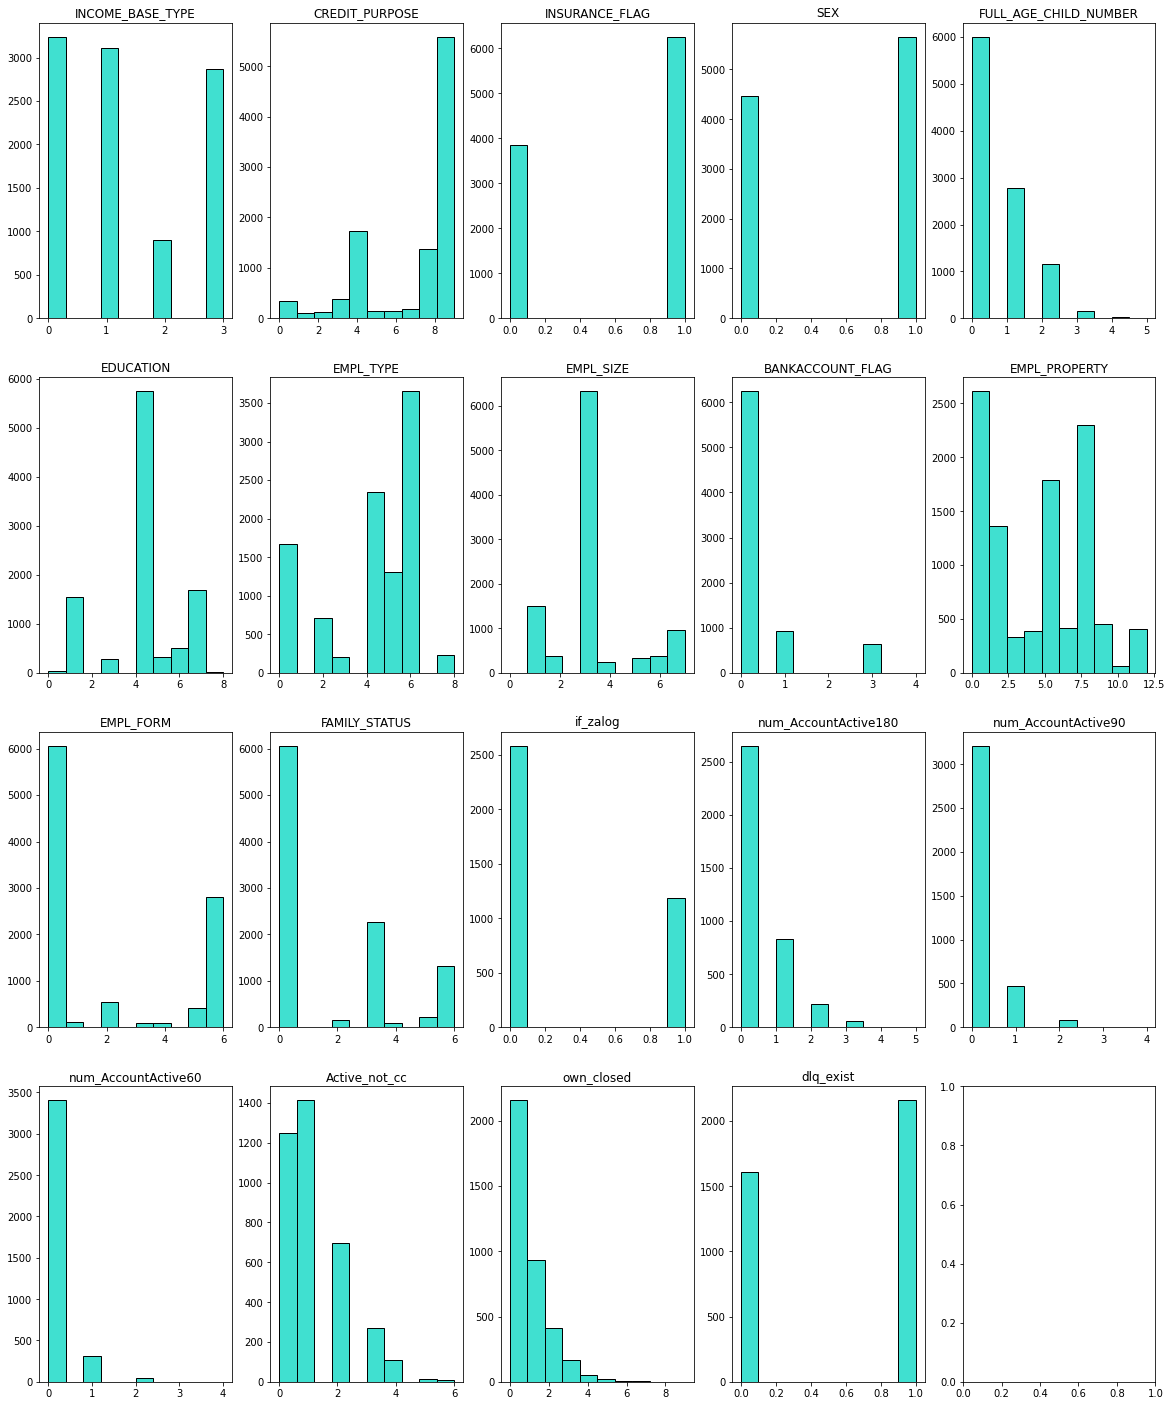

In [56]:
r = 4
c = 5
categorical_data = cd[categorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (r*5, c*5))

i = 0
j = 0

for col in categorical_data.columns:
    if (i < r) & (j < c): 
      ax[i, j].hist(categorical_data[col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      ax[i, j].hist(categorical_data[col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Можно отметить, что соотношение категориальных переменных, в основном, непропорционально, а потому они не являются подходящим для сегментации признаками. Переменные INCOME_BASE_TYPE, SEX и dlq_exist не имеют выбросов и распределены пропорционально, что сохраняет принцип онородности-разнородности, так как нет "скошенности" в одну сторону категории, и категории четко различимы в данных, поэтому они будут хорошими признаками для сегментации.

Теперь проведем анализ выбросов в числовых наборах данных. Для этого построим боксплоты.

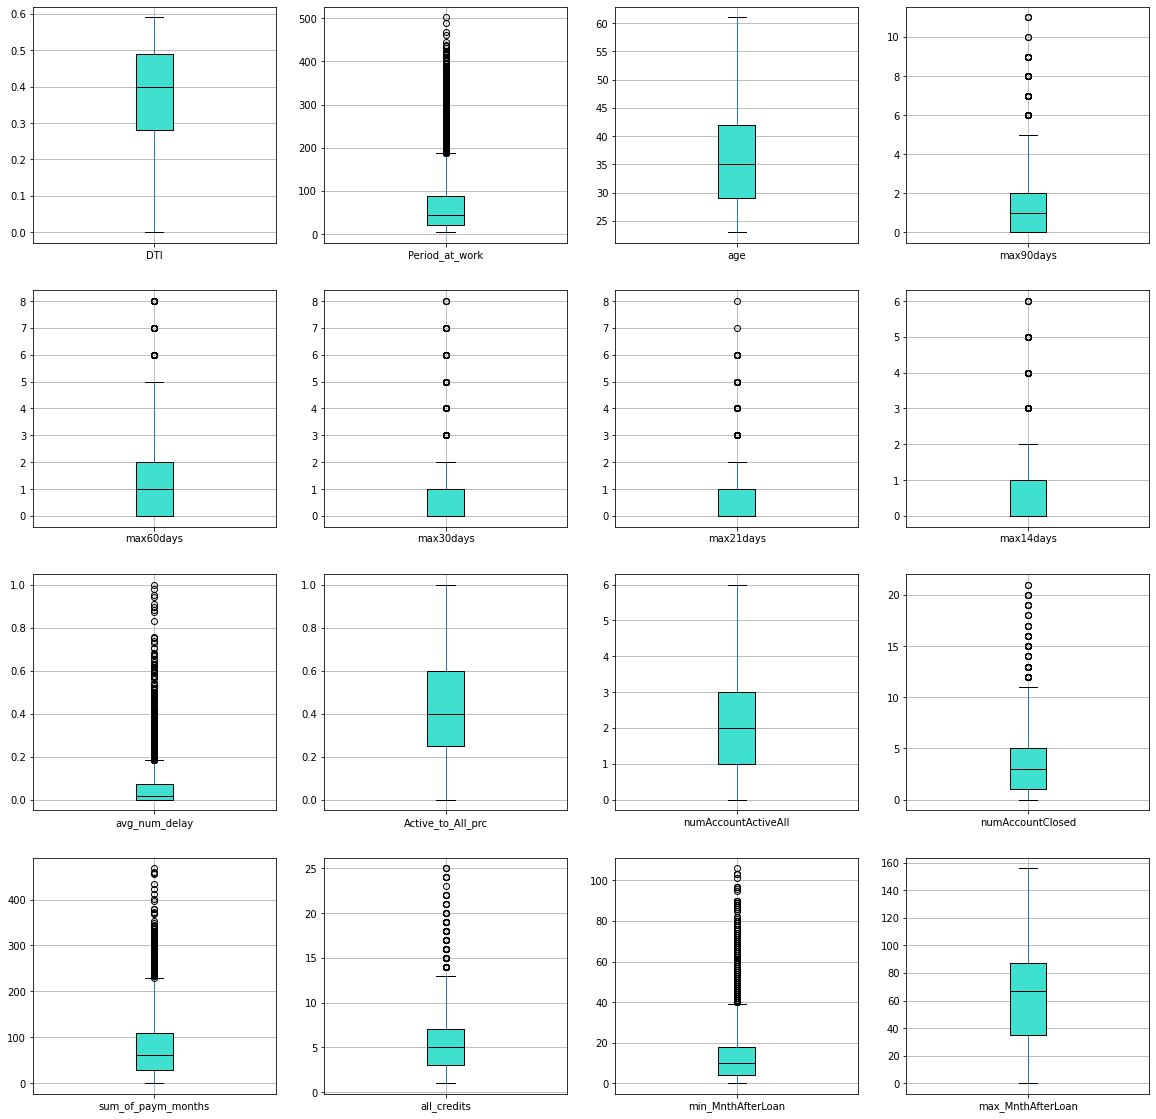

In [85]:
r = 4
c = 4
numeric_data = data[notcategorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (r*5, c*5))

i = 0
j = 0

for col in numeric_data.columns:
    if (i < r) & (j < c):
      numeric_data[numeric_data[col] >= 0].boxplot(column=col, ax=ax[i, j], patch_artist=True, 
                           boxprops=dict(facecolor='turquoise', color='black'),
                           medianprops=dict(color='black'))
                           
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      numeric_data[numeric_data[col] >= 0].boxplot(column=col, ax=ax[i, j], patch_artist=True, 
                           boxprops=dict(facecolor='turquoise', color='black'),
                           medianprops=dict(color='black'))
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Переменные DTI, age, Active_to_All_prc и max_MnthAfterLoan не имеют выбрасов, поэтому их хорошо использовать в модели. Такие поля как Period_at_work, avg_num_delay, sum_of_paym_months min_MonthAfterLoan имеют очень большое количество выбросов. Довольно много выбросов имеют также max90days, numAccountClosed, all_credits. Эти признаки использовать при построении модели не стоит, или же только с заменой выбросов медианным значением. Удолять выбросы нецелесообразно, так как их много. Можено удалить выбросы точечно, чтобы стало чуть лучше, но обьем данных уменьшился незаметно.

In [60]:
data.shape

(10120, 35)

In [84]:
data = data[data['max90days'] < 12]
data = data[data['age'] < 62]
data = data[data['max21days'] < 9]
data = data[data['max30days'] < 9]
data = data[data['max60days'] < 9]
data = data[data['numAccountClosed'] < 23]
data = data[data['all_credits'] < 40]
data = data[data['sum_of_paym_months'] < 500]
data = data[data['numAccountActiveAll'] < 7]
data.shape


(9998, 35)

ПОДГОТОВКА ИТОГОВОЙ ВИТРИНЫ НА ОСНОВЕ ПРОВЕДЕННОГО АНАЛИЗА



1.   Работа с пропущенными значениями
2.   Работа с выбросами
3.   Преобразование переменых типа объект в числоввые переменные







ВЫВОД ПО ВЫБРОСАМ:


Переменные INCOME_BASE_TYPE и SEX не имеют выбросов и распределены пропорционально, что сохраняет принцип онородности-разнородности, так как нет "скошенности" в одну сторону категории, и категории четко различимы в данных.

ДАЛЕЕ МОЖНО ПРЕОБРАЗОВАТЬ КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ


Только надо будет еще подумать над тем, как убрать пропущенные значения


In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)
cd = pd.DataFrame(index=data.index)
cd[data['EDUCATION'].unique().tolist()] = one_hot_encoder.fit_transform(data['EDUCATION'].values.reshape(-1,1))
cd.head()

In [ ]:
a = data[data['EDUCATION'].isnull() != 1 ]
a['EDUCATION'].unique().tolist()

['высшее',
 'среднее-специальное',
 'незаконченное высшее',
 'Высшее/Второе высшее/Ученая степень',
 'второе высшее',
 'среднее',
 '*n.a.*',
 'ученая степень',
 'Неполное среднее']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
cd = pd.DataFrame(index=data.index)
cd[['женский','мужской']] = one_hot_encoder.fit_transform(data['SEX'].values.reshape(-1,1))
cd[data['EDUCATION'].unique().tolist()] = one_hot_encoder.fit_transform(data['EDUCATION'].values.reshape(-1,1))
cd.head()



,женский,мужской,высшее,среднее-специальное,незаконченное высшее,Высшее/Второе высшее/Ученая степень,второе высшее,среднее,*n.a.*,ученая степень,Неполное среднее
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


ВЫВОДЫ ПО ПЕРВОЙ ЧАСТИ РАБОТЫ:



*   В данных достаточно много пропущенных значений, выбрасывать их нецелесообразно. Пропущенные значения заменяются константой -37.

*   Переменные MIN_MNTHAFTERLOAN и MAX_MNTHAFTERLOAN имеют недопустимые значения, которые было решено удалить из выборки.

*   Переменные слабо коррелируют между собой, линейно-регрессионный анализ неуместен.

*   Для кодировки пропущенных значений в данных также присутствует строковая метка '*n.a*'.


С учетом всех корректировок была составлена финальная витрина.



In [ ]:
#data.to_csv("Anna_Trushnikova_BBI172_HW1.csv", index=False)

In [ ]:
data = data[(data['max_MnthAfterLoan'] != -1) & (data['min_MnthAfterLoan'] != -1)]

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))